In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings;
import pandas as pd
import importlib
import sys
import scipy.signal as signal
sys.path.append('../')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

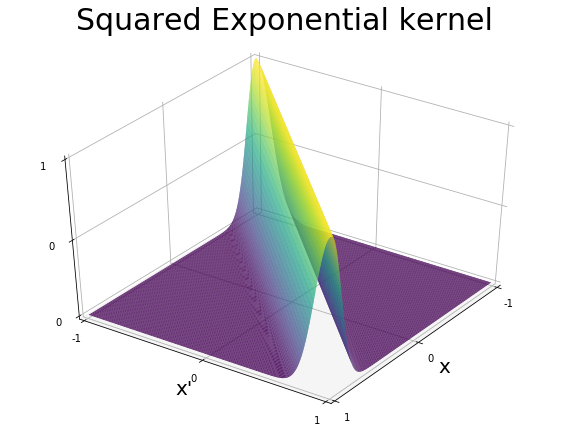

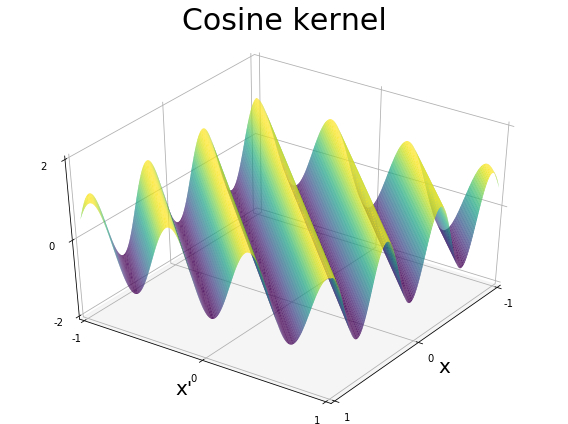

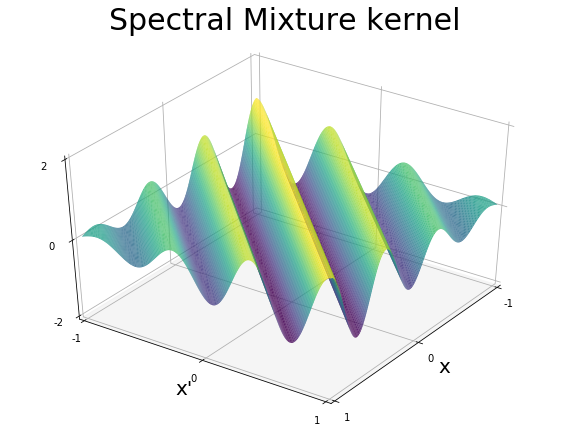

In [4]:
def SE(X,Y,l=1):
    return np.exp(-(np.abs(X-Y)**2/0.03)/l**2)
def Cosine(X,Y):
    return np.cos(10 * np.abs(X-Y))

def Gabor(X,Y):
    return SE(X,Y,l=8.) * Cosine(X,Y)

def get_3d_axis(f, title, fpath=None,zlim = None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca(projection='3d')
    
    X = np.arange(-1, 1, 0.01)
    Y = np.arange(-1, 1, 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = f(X,Y)
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,rasterized=True)
    ax.view_init(40, 35)
    # Customize the z axis.
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    if zlim is not None:
        ax.set_zlim(zlim[0],zlim[1])

    ax.zaxis.set_major_locator(LinearLocator(3))
    ax.xaxis.set_major_locator(LinearLocator(3))
    ax.yaxis.set_major_locator(LinearLocator(3))
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel("x'",fontsize=20)

    ax.set_title(title, y = 1.1,fontsize=30)
    plt.gcf().subplots_adjust(bottom=-0.05)
    plt.tight_layout()
    if fpath is not None:
        plt.savefig(fpath, dpi=200)
    plt.show()
    
get_3d_axis(SE,'Squared Exponential kernel','../Figures/surface plots/SE_timedomain.pdf')
get_3d_axis(Cosine,'Cosine kernel',zlim=[-2,2],fpath='../Figures/surface plots/cos_timedomain.pdf')
get_3d_axis(Gabor,'Spectral Mixture kernel',zlim=[-2,2],fpath='../Figures/surface plots/SM_timedomain.pdf')

## Spectral Densities

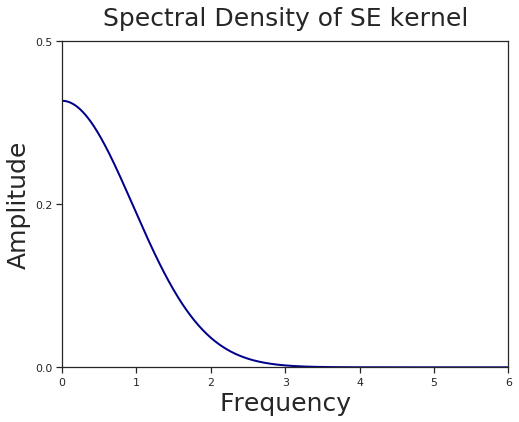

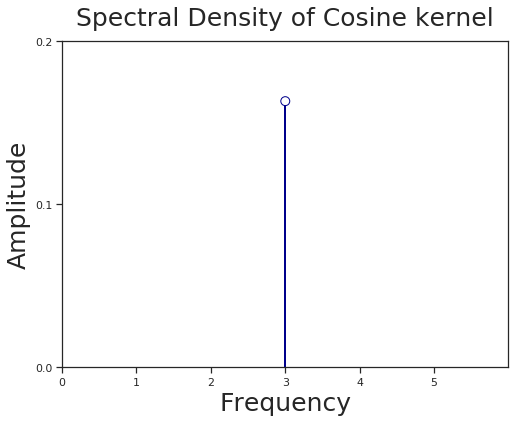

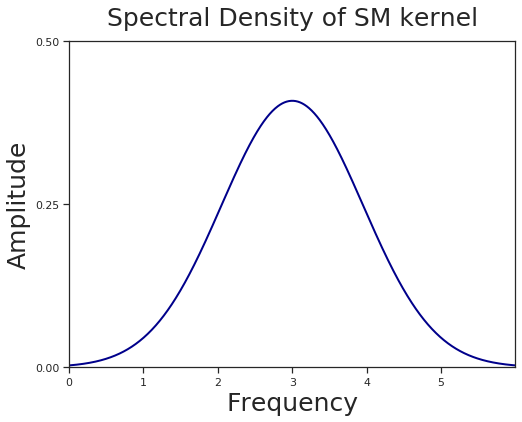

In [10]:
import seaborn as sns
sns.set(style='ticks')
def spectral_density_plot(f, name, fname=None):
    fig, ax = plt.subplots(figsize=(8,6))
    xx = np.linspace(0,6,1000)
    ax.plot(xx, f(xx),color='darkblue',linewidth=2.)
    ax.set_title(name, fontsize=25,y=1.03)
    ax.yaxis.set_major_locator(LinearLocator(3))
    #ax.xaxis.set_major_locator(LinearLocator(3))

    ax.set_ylabel('Amplitude', fontsize=25)
    ax.set_xlabel('Frequency', fontsize=25)
    #ax.set_xticks(np.arange(0,6))#,np.arange(0,6))
    ax.set_ylim(0,0.5)
    ax.set_xlim(0,6)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    if fname is not None:
        plt.savefig(fname)
    plt.show()
    
def plot_SM_density(f, name, fname=None):
    fig, ax = plt.subplots(figsize=(8,6))
    xx = np.linspace(0,6,1000)
    result = np.maximum.reduce([f(xx,3), f(xx,-3)])
    ax.plot(xx, result,color='darkblue',linewidth=2.)

    #ax.plot(xx, f(xx,3),color='black',linewidth=2.)
    #ax.plot(xx, f(xx,-3),color='black',linewidth=2.)

    ax.set_title(name, fontsize=25,y=1.03)
    ax.yaxis.set_major_locator(LinearLocator(3))
    #ax.xaxis.set_major_locator(LinearLocator(3))
    #ax.axvline(0, color='k', linestyle='--')
    ax.set_ylabel('Amplitude', fontsize=25)
    ax.set_xlabel('Frequency', fontsize=25)
    ax.set_xticks(np.arange(0,6))#,np.arange(0,6))
    ax.set_ylim(0,0.5)
    ax.set_xlim(0,6)
    if fname is not None:
        plt.savefig(fname, dpi=400)
    plt.show()
    
def plot_sine_density(f, name, fname=None):
    fig, ax = plt.subplots(figsize=(8,6))
    xx = np.linspace(0,6,1000)
    ax.plot([3,3], [0,0.2],color='darkblue',linewidth=2.)
    plt.scatter([3], [0.204], s=80, facecolors='none', edgecolors='darkblue')
    
    ax.set_ylabel('Amplitude', fontsize=25)
    ax.set_xlabel('Frequency', fontsize=25)
    
    ax.set_title(name, fontsize=25,y=1.03)
    #ax.yaxis.set_major_locator(LinearLocator(3))
    #ax.xaxis.set_major_locator(LinearLocator(3))
    ax.set_xlim(0,6)
    ax.set_ylim(0,0.25)
    ax.set_xticks(np.arange(0,6))#,np.arange(0,6))   
    ax.yaxis.set_major_locator(LinearLocator(3))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    if fname is not None:
        plt.savefig(fname)
    plt.show()
def SE_density(s, mean=0): 
    var = 1/np.sqrt(1.1)
    exp_term = np.exp(- (np.power ((s-mean)/var, 2.) /2))
    normalization_term = 1 / ( np.sqrt(2.*np.pi*var))
    return exp_term * normalization_term

def cos_density(s):
    freq = 3
    return [0 if np.round(s_i,2)!=freq else 0.1*freq for s_i in s]


def gabor_density(s,freq=3):
    return SE_density(s, mean=freq)

spectral_density_plot(SE_density, 'Spectral Density of SE kernel',fname='../Figures/surface plots/SE_freqdomain.pdf')
plot_sine_density(cos_density, 'Spectral Density of Cosine kernel',fname='../Figures/surface plots/cos_freqdomain.pdf')
plot_SM_density(gabor_density, 'Spectral Density of SM kernel','../Figures/surface plots/SM_freqdomain.pdf')